In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning

In [17]:
#import researchpy as rp
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.formula.api as smf

In [3]:
loose=pd.read_csv('C:/Users/Hanna/Documents/GitHub/LRDC-Research/CSV/loose.csv')
whole=pd.read_csv('C:/Users/Hanna/Documents/GitHub/LRDC-Research/CSV/whole.csv')

In [4]:
loose.head()

,Unnamed: 0,answer_id,anon_id,L1,level_id,question_id,text3_len,text3 (edits made to fix word counts),processed_text,wordtype_len
0,0,34686.0,aa0,Spanish,5.0,4497.0,109.0,"Barber, chef by profession, but an expert on a...",barber chef by profession but an expert on agr...,79
1,1,32129.0,aa0,Spanish,5.0,4199.0,190.0,"The article ""English as Co star"" support the f...",the article english as co star support the fac...,117
2,2,33302.0,aa0,Spanish,5.0,4346.0,193.0,"In this article the authors Goleman, Kaufman a...",in this article the authors goleman kaufman an...,122
3,3,33308.0,aa0,Spanish,5.0,4347.0,170.0,"Flow in the sense expressed in the text ""The C...",flow in the sense expressed in the text the cr...,103
4,4,32572.0,aa0,Spanish,5.0,4260.0,85.0,"Bill Gates, in this conference, explained two ...",bill gates in this conference explained two bi...,66


In [5]:
loose.dtypes

Unnamed: 0                                 int64
answer_id                                float64
anon_id                                   object
L1                                        object
level_id                                 float64
question_id                              float64
text3_len                                float64
text3 (edits made to fix word counts)     object
processed_text                            object
wordtype_len                               int64
dtype: object

In [6]:
whole.head()

,Unnamed: 0,anon_id,native_language,answer_id,question_id,text_len,text,level_id,processed_text,wordtype_len
0,0,ax4,Chinese,954,48,479,The Effects on Students Who Have a Part-time J...,5,the effects on students who have a parttime jo...,166
1,1,ax4,Chinese,1219,97,259,There are many different kinds of people in th...,5,there are many different kinds of people in th...,105
2,2,ax4,Chinese,1257,74,548,Should the Death Penalty Exist\nThe death pena...,5,should the death penalty exist the death penal...,191
3,3,ax4,Chinese,1260,119,576,Should the Death Penalty Exist?\nThe death pen...,5,should the death penalty exist the death penal...,213
4,4,ax4,Chinese,2162,190,180,The nationality rooms built in the Cathedral o...,5,the nationality rooms built in the cathedral o...,90


In [7]:
whole.dtypes

Unnamed: 0          int64
anon_id            object
native_language    object
answer_id           int64
question_id         int64
text_len            int64
text               object
level_id            int64
processed_text     object
wordtype_len        int64
dtype: object

In [14]:
loose.describe()

,Unnamed: 0,answer_id,level_id,question_id,text3_len,wordtype_len
count,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000,1810.000000
mean,904.500000,20244.689503,4.209945,2691.835912,216.344199,109.112155
std,522.646311,11838.959295,0.630977,1507.187983,186.248885,65.161933
min,0.000000,133.000000,3.000000,17.000000,60.000000,29.000000
25%,452.250000,11300.250000,4.000000,1593.000000,106.250000,67.000000
50%,904.500000,19316.000000,4.000000,2615.000000,156.000000,90.000000
75%,1356.750000,29618.750000,5.000000,3927.000000,246.750000,127.000000
max,1809.000000,48254.000000,5.000000,6105.000000,1932.000000,602.000000


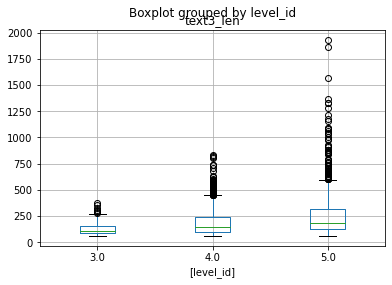

In [15]:
boxplot=loose.boxplot(['text3_len'],by=['level_id'])

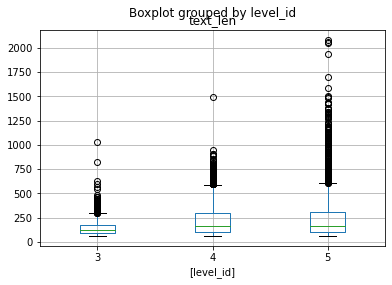

In [36]:
boxplot=whole.boxplot(['text_len'],by=['level_id'])

In [ ]:
#to tell model it's categorical needs to be wrapped; C(ind_var)
#doesnt show level 3

In [29]:
model=smf.mixedlm('text3_len~C(level_id)',loose,groups='level_id').fit()
model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Mixed Linear Model Regression Results
========================================================================
Model:                 MixedLM      Dependent Variable:      text3_len  
No. Observations:      1810         Method:                  REML       
No. Groups:            3            Scale:                   32257.5142 
Min. group size:       210          Log-Likelihood:          -11953.0353
Max. group size:       1010         Converged:               Yes        
Mean group size:       603.3                                            
------------------------------------------------------------------------
                     Coef.      Std.Err.      z   P>|z|  [0.025   0.975]
------------------------------------------------------------------------
Intercept            129.357        180.031 0.719 0.472 -223.497 482.211
C(level_id)[T.4.0]    67.212        254.363 0.264 0.792 -431.330 565.755
C(level_id)[T.5.0]   151.800        254.408 0.597 0.551 -346.830 650.431
level_id Var       32257.514 3811494847.163                             
========================================================================

"""

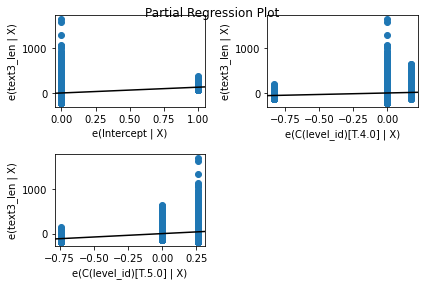

In [35]:
fig=sm.graphics.plot_partregress_grid(model)

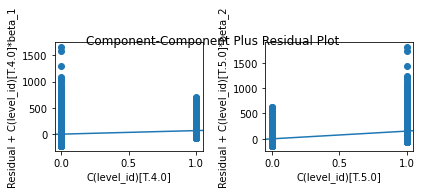

In [26]:
fig=sm.graphics.plot_ccpr_grid(model)

In [31]:
loose.head()

,Unnamed: 0,answer_id,anon_id,L1,level_id,question_id,text3_len,text3 (edits made to fix word counts),processed_text,wordtype_len
0,0,34686.0,aa0,Spanish,5.0,4497.0,109.0,"Barber, chef by profession, but an expert on a...",barber chef by profession but an expert on agr...,79
1,1,32129.0,aa0,Spanish,5.0,4199.0,190.0,"The article ""English as Co star"" support the f...",the article english as co star support the fac...,117
2,2,33302.0,aa0,Spanish,5.0,4346.0,193.0,"In this article the authors Goleman, Kaufman a...",in this article the authors goleman kaufman an...,122
3,3,33308.0,aa0,Spanish,5.0,4347.0,170.0,"Flow in the sense expressed in the text ""The C...",flow in the sense expressed in the text the cr...,103
4,4,32572.0,aa0,Spanish,5.0,4260.0,85.0,"Bill Gates, in this conference, explained two ...",bill gates in this conference explained two bi...,66


In [33]:
test=loose.query('level_id==3')

In [34]:
test

,Unnamed: 0,answer_id,anon_id,L1,level_id,question_id,text3_len,text3 (edits made to fix word counts),processed_text,wordtype_len
24,24,4654.0,aa9,Korean,3.0,552.0,153.0,"Dear Alok, I have a problem want to share with...",dear alok i have a problem want to share with ...,83
25,25,2600.0,aa9,Korean,3.0,302.0,60.0,"While I was taking the trolley yesterday, I sa...",while i was taking the trolley yesterday i saw...,37
29,29,4476.0,aa9,Korean,3.0,550.0,76.0,"Hi Mike, I'm getting ready for the party tonig...",hi mike im getting ready for the party tonight...,54
30,30,2772.0,aa9,Korean,3.0,317.0,83.0,I used to live in China for a long years. I us...,i used to live in china for a long years i use...,52
32,32,3414.0,aa9,Korean,3.0,402.0,93.0,My uncle had a difficult childhood. He grew up...,my uncle had a difficult childhood he grew up ...,56
...,...,...,...,...,...,...,...,...,...,...
1744,1744,2808.0,gv1,Korean,3.0,312.0,88.0,I think thay my writing habit is very commom. ...,i think thay my writing habit is very commom i...,59
1745,1745,2781.0,gv1,Korean,3.0,317.0,66.0,I used to live in Korea. I used to collect sta...,i used to live in korea i used to collect stam...,36
1766,1766,20639.0,gz0,Korean,3.0,2764.0,74.0,"When I was childhool, I used to play barbies. ...",when i was childhool i used to play barbies i ...,45
1767,1767,21418.0,gz0,Korean,3.0,2835.0,122.0,"When I was 18 years old, I went the North of K...",when i was 18 years old i went the north of ko...,67
